In [1]:
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Function to perform bootstrap sampling
def bootstrap_diff(model_1_results, model_2_results, n_iterations=10000):
    n_size = len(model_1_results)
    diff_means = []

    for i in range(n_iterations):
        # Generate bootstrap sample
        sample_1 = resample(model_1_results, n_samples=n_size, random_state=i)
        sample_2 = resample(model_2_results, n_samples=n_size, random_state=i)
        
        # Calculate the difference in means
        diff_mean = np.mean(sample_1) - np.mean(sample_2)
        diff_means.append(diff_mean)
    
    return diff_means

# Results

| Model                 | ID  | Result 1 | Result 2 |
|-----------------------|-----|----------|----------|
| BERT Baseline (GELU)  | 42  | 54.94    | 49.22    |
| BERT Baseline (GELU)  | 2   | 59.5     | 59.9     |
| BERT Baseline (GELU)  | 3   | 59.6     | 56.6     |
| BERT Baseline (GELU)  | 4   | 59.3     | 57       |
| BERT Baseline (GELU)  | 5   | 59.1     | 57.5     |
| GPT Baseline (GELU)   | 42  | 59.05    | 58.22    |
| GPT Baseline (GELU)   | 1   | 58       | 58.5     |
| GPT Baseline (GELU)   | 2   | 56.6     | 57.8     |
| GPT Baseline (GELU)   | 3   | 56.6     | 59.1     |
| GPT Baseline (GELU)   | 4   | 59.2     | 60.5     |
| GPT Baseline (GELU)   | 5   | 57.4     | 59.6     |
| BERT Learnable GELU   | 42  | 59.4     | 57.1     |
| BERT Learnable GELU   | 1   | 59.8     | 56.2     |
| BERT Learnable GELU   | 2   | 59.3     | 59.7     |
| BERT Learnable GELU   | 3   | 59       | 57       |
| BERT Learnable GELU   | 4   | 58.2     | 57       |
| BERT Learnable GELU   | 5   | 59.8     | 59.2     |
| GPT Learnable GELU    | 42  | 56.8     | 60.2     |
| GPT Learnable GELU    | 1   | 56.3     | 58.8     |
| GPT Learnable GELU    | 2   | 57.4     | 58.7     |
| GPT Learnable GELU    | 3   | 58.7     | 59.6     |
| GPT Learnable GELU    | 4   | 56       | 59.2     |
| GPT Learnable GELU    | 5   | 58.3     | 59.3     |
| BERT ReLU             | 42  | 58.5     | 57.2     |
| GPT ReLU              | 42  | 56.6     | 59.9     |
| BERT SiLU             | 42  | 58.3     | 57.5     |
| GPT SiLU              | 42  | 56.3     | 59.9     |
| BERT Swish            | 42  | 58       | 57.8     |
| GPT Swish             | 42  | 53.7     | 57.6     |
| BERT PReLU            | 42  | 57       | 57.6     |
| GPT PReLU             | 42  | 59.2     | 56.1     |
| BERT KAN              | 42  | 56.69    | 63.65    |
| GPT KAN               | 42  | 63.43    | 48.8     |


### Blimp benchmark anaylis for Baseline and Learnable GELU models

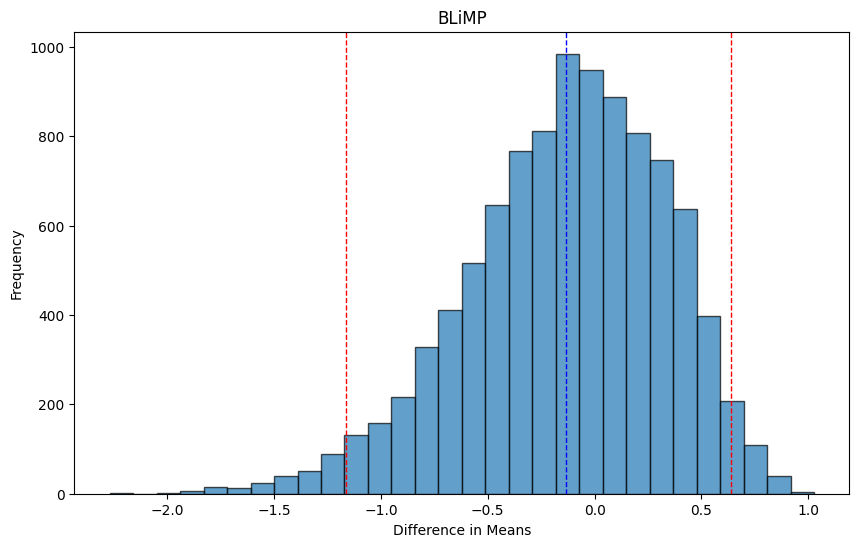

(-0.13485518181817577, array([-1.16181818,  0.63636364]))

In [2]:
baseline_results = np.array([54.94, 59.5, 59.6, 59.3, 59.1, 59.05, 58, 56.6, 56.6, 59.2, 57.4])
improved_results = np.array([59.4, 59.8, 59.3, 59, 58.2, 59.8, 56.8, 56.3, 57.4, 58.7, 56, 58.3])

# Perform bootstrap sampling
diff_means = bootstrap_diff(baseline_results, improved_results)

# Calculate 95% confidence interval
conf_interval = np.percentile(diff_means, [2.5, 97.5])
mean_diff = np.mean(diff_means)

# Plot the distribution of differences
plt.figure(figsize=(10, 6))
plt.hist(diff_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(conf_interval[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[1], color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_diff, color='blue', linestyle='dashed', linewidth=1)
plt.title('BLiMP')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

(mean_diff, conf_interval)

### GLUE benchmark analysis for Baseline and Learnable GELU models 

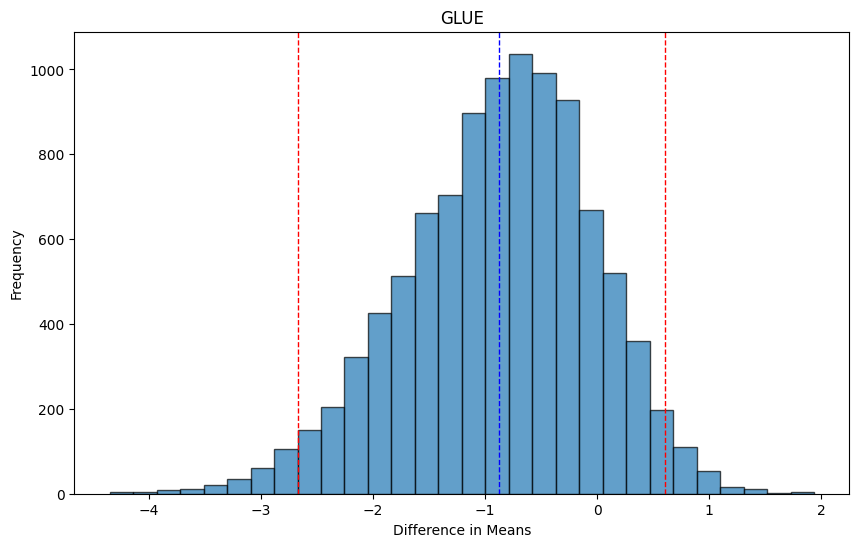

(-0.8785218181818234, array([-2.67454545,  0.60377273]))

In [3]:
baseline_glue_results = np.array([49.22, 59.9, 56.6, 57, 57.5, 58.22, 58.5, 57.8, 59.1, 60.5, 59.6])
improved_glue_results = np.array([57.1, 56.2, 59.7, 57, 57, 59.2, 60.2, 58.8, 58.7, 59.6, 59.2, 59.3])

# Perform bootstrap sampling
diff_means_glue = bootstrap_diff(baseline_glue_results, improved_glue_results)

# Calculate 95% confidence interval
conf_interval_glue = np.percentile(diff_means_glue, [2.5, 97.5])
mean_diff_glue = np.mean(diff_means_glue)

# Plot the distribution of differences
plt.figure(figsize=(10, 6))
plt.hist(diff_means_glue, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(conf_interval_glue[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval_glue[1], color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_diff_glue, color='blue', linestyle='dashed', linewidth=1)
plt.title('GLUE')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

(mean_diff_glue, conf_interval_glue)

### Blimp on BERT Baseline vs Learnable GELU

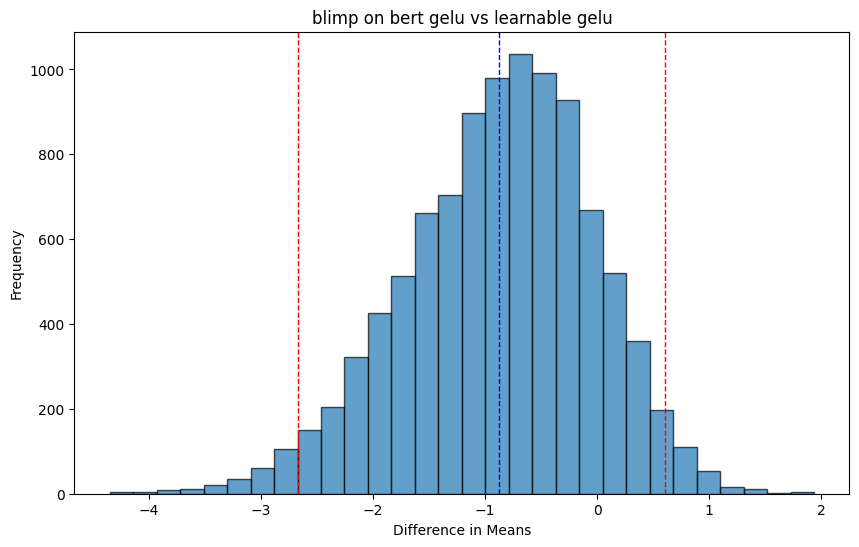

(-0.8785218181818234, array([-2.67454545,  0.60377273]))

In [4]:
baseline_blimp_results = np.array([54.94, 59.5, 59.6, 59.3, 59.1])
improved_blimp_results = np.array([59.05, 58, 56.6, 56.6, 59.2, 57.4])

# Perform bootstrap sampling
diff_means_glue = bootstrap_diff(baseline_glue_results, improved_glue_results)

# Calculate 95% confidence interval
conf_interval_glue = np.percentile(diff_means_glue, [2.5, 97.5])
mean_diff_glue = np.mean(diff_means_glue)

# Plot the distribution of differences
plt.figure(figsize=(10, 6))
plt.hist(diff_means_glue, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(conf_interval_glue[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval_glue[1], color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_diff_glue, color='blue', linestyle='dashed', linewidth=1)
plt.title('blimp on bert gelu vs learnable gelu')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

(mean_diff_glue, conf_interval_glue)

### Other functions adaptive vs non-adaptive BLiMP

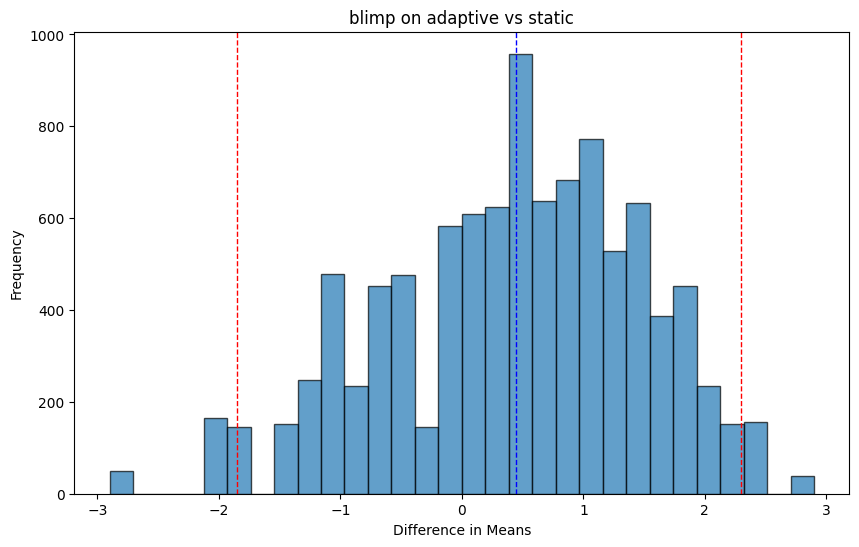

(0.4429499999999982, array([-1.85,  2.3 ]))

In [7]:
static_blimp_results = np.array([58.5, 56.6, 58.3, 56.3])
adaptive_blimp_results = np.array([58, 53.7, 57, 59.2])

# Perform bootstrap sampling
diff_means_glue = bootstrap_diff(static_blimp_results, adaptive_blimp_results)

# Calculate 95% confidence interval
conf_interval_glue = np.percentile(diff_means_glue, [2.5, 97.5])
mean_diff_glue = np.mean(diff_means_glue)

# Plot the distribution of differences
plt.figure(figsize=(10, 6))
plt.hist(diff_means_glue, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(conf_interval_glue[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval_glue[1], color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_diff_glue, color='blue', linestyle='dashed', linewidth=1)
plt.title('blimp on adaptive vs static')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

(mean_diff_glue, conf_interval_glue)

### Other functions adaptive vs non-adaptive GLUE

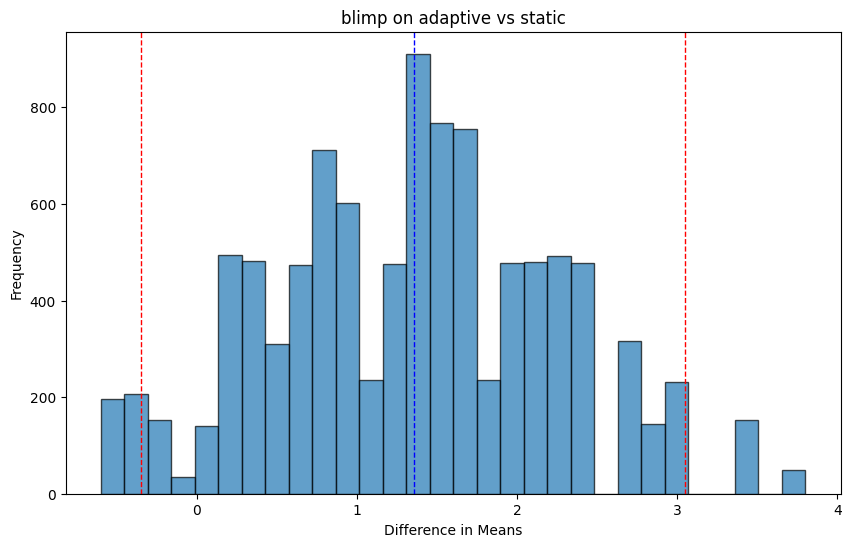

(1.3552750000000007, array([-0.35,  3.05]))

In [8]:
static_glue_results = np.array([57.2, 59.9, 57.5, 59.9])
adaptive_glue_results = np.array([57.8, 57.6, 57.6, 56.1])

# Perform bootstrap sampling
diff_means_glue = bootstrap_diff(static_glue_results, adaptive_glue_results)

# Calculate 95% confidence interval
conf_interval_glue = np.percentile(diff_means_glue, [2.5, 97.5])
mean_diff_glue = np.mean(diff_means_glue)

# Plot the distribution of differences
plt.figure(figsize=(10, 6))
plt.hist(diff_means_glue, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(conf_interval_glue[0], color='r', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval_glue[1], color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean_diff_glue, color='blue', linestyle='dashed', linewidth=1)
plt.title('blimp on adaptive vs static')
plt.xlabel('Difference in Means')
plt.ylabel('Frequency')
plt.show()

(mean_diff_glue, conf_interval_glue)